# Projeto Insight - House Rocket

### 1 - Imports

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly.express as px
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#Função para formatar os numeros
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


### 2 - Loading data

In [3]:

data = pd.read_csv('DataSet/kc_house_data.csv')

### 3 - Functions

In [7]:
#Função para plotar os graficos nos Insights
def plot_bar (df, x, y):

    fig = px.bar(df, x, y)
    fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template = 'simple_white',
                  paper_bgcolor="#f7f8fa", width=800,height=400)

    fig.show()

#Função que executa o percentual para cada Insights
def calculo_percentual (df, coluna):
    date = df.sort_values(by= coluna, ascending=True).reset_index().drop(columns='index')
    date=(date.loc[1, coluna] / date.loc[0, coluna] - 1) * 100

    return date

### 4 - Data cleaning

##### 4.1 Dataset structure

In [8]:
print('Numero de linhas: {}'.format(data.shape[0]))
print('Numero de Colunas: {}'.format(data.shape[1]))

#Visualizando os 5 primeiros dados:
data.head()

Numero de linhas: 21613
Numero de Colunas: 21


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180.00,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170.00,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770.00,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050.00,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680.00,0,1987,0,98074,47.62,-122.05,1800,7503


##### 4.2 Visualization and transformation

In [9]:
#Transformação da Coluna data de String para Datetime
data['date'] = pd.to_datetime(data['date'])

#Visualização dos dados por tipo. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21611 non-null  float64       
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

##### 4.3 "floors" Column Transformation

<BarContainer object of 21613 artists>

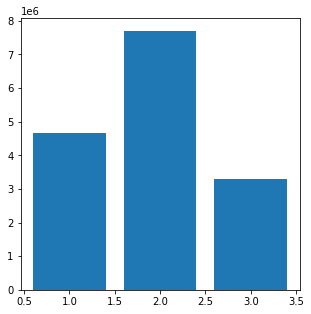

In [4]:
#Convertendo para tipo int

data['floors'] = data['floors'].astype(int)

#plot
fig= plt.figure(figsize= (5, 5))
plt.bar(x=data['floors'], height=data['price'] )

##### 4.4 Missing data

In [10]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 5 - Exploração dos dados

#### 5.1 Descriptive Statistical

In [22]:
num_atributes = data.select_dtypes(include=['int64', 'float64'])
cat_atributes = data.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

##### 5.1.1 Numerical Atributes

In [15]:
#Central Tendency - mean - median
ct1 = pd.DataFrame(num_atributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_atributes.apply(np.median)).T

#Dispersion - STD, min, max, range, sken, Kurtosis
d1 = pd.DataFrame(num_atributes.apply(np.std)).T
d2 = pd.DataFrame(num_atributes.apply(min)).T
d3 = pd.DataFrame(num_atributes.apply(max)).T
d4 = pd.DataFrame(num_atributes.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_atributes.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(num_atributes.apply(lambda x: x.kurtosis() )).T

#Concatenate

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580301520.86,3904930410.00,2876499023.43,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,540088.14,450000.00,367118.70,4.02,34.59
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.97,49.06
3,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
4,sqft_living,290.00,13540.00,13250.00,2079.90,1910.00,918.42,1.47,5.24
5,sqft_lot,520.00,1651359.00,1650839.00,15106.97,7618.00,41419.55,13.06,285.08
6,floors,1.00,3.50,2.50,1.49,1.50,0.54,0.62,-0.48
7,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.39,127.63
8,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
9,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53


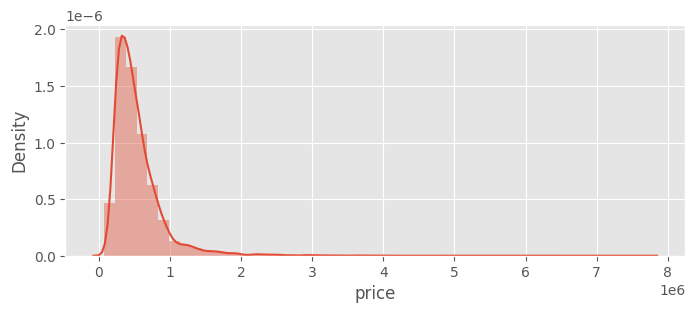

In [18]:
plt.figure(figsize=(8, 3 ))
sns.distplot(data['price'])
plt.show()

##### 5.1.2 Categorical Atributes

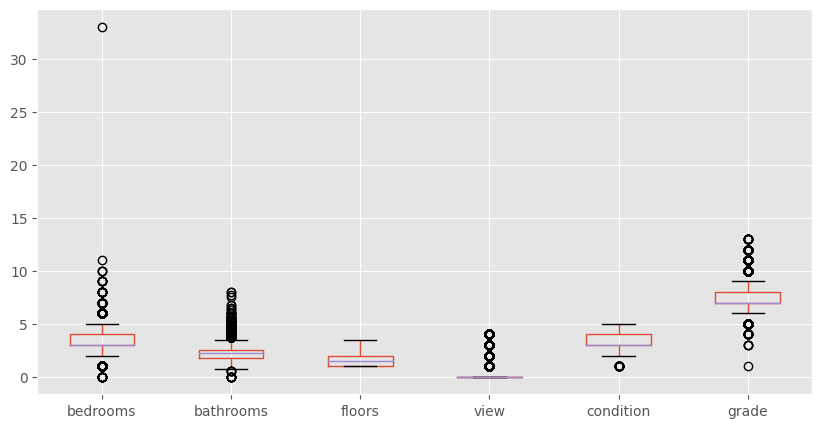

In [30]:
columns = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade']

plt.figure(figsize = (10, 5))
plt.style.use('ggplot')
data.boxplot(column=columns);

In [31]:
#Remoção de Outliers

data[data['bedrooms'] == 33]
data.drop(data[data['bedrooms'] == 33].index, inplace=True)

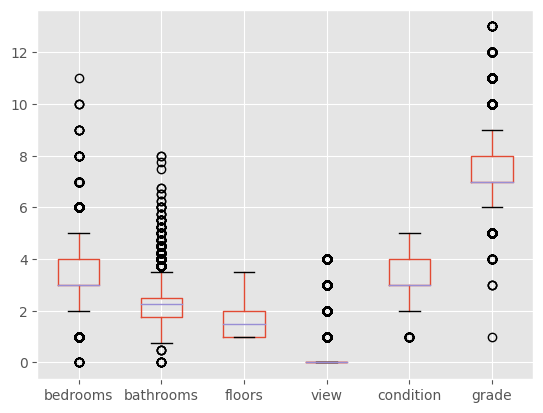

In [32]:
columns = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade']
plt.style.use('ggplot')
data.boxplot(column=columns);

- Neste caso como é um projeto de insigts, foi removido apenas o imovel com a quantidade de banheiros 33, iremos manter os demais. 

### 6 - Feature Engineering

##### 6.1 Feature Engineering

In [33]:
df1 = data.copy()

#Delimitador entre imoveis antigos, e novos (anteriores a 1955 serão considerados antigos)
df1.loc[df1['yr_built'] < 1955, 'age_house'] = 'old'
df1.loc[df1['yr_built'] >= 1955, 'age_house'] = 'new'


#Imoveis com ou sem porão
df1.loc[df1['sqft_basement'] == 0, 'basement'] = 'no'
df1.loc[df1['sqft_basement'] > 0, 'basement'] = 'yes'

#Criação de uma nova coluna apenas como ano da publicação do Imovel para venda.
df1['year'] = pd.to_datetime(df1['date']).dt.year

# Coluna contendo apenas o mês da publicacao do imovel para a venda
df1['month'] = pd.to_datetime(df1['date']).dt.month
df1['month_name'] = pd.to_datetime(df1['date']).dt.month_name()

# Coluna discriminando se o imovel foi ou nao renovado
df1.loc[df1['yr_renovated'] == 0, 'renovated'] = 'no'
df1.loc[df1['yr_renovated'] > 0, 'renovated'] = 'yes'


# Coluna discriminando as estacoes do ano em que o imovel foi publicado a venda

#Summer = Verão:  acontece entre Junho e Agosto; mes 6 ao mes 8
#Autumn/Fall = Outuno: vai de Setembro a Novembro; mes 9 ao mes 11
#Winter = Inverno: começa em Dezembro até Fevereiro; mes 12 ao mes 2
#Spring = Primavera: se dá de Março a Maio. mes 3 ao mes 5

df1.loc[(df1['month'] >= 6) & (df1['month'] <= 8), 'season'] = 'summer'
df1.loc[(df1['month'] >= 9) & (df1['month'] <= 11), 'season'] = 'Autumn'
df1.loc[(df1['month'] == 12) | (df1['month'] <= 2), 'season'] = 'Winter'
df1.loc[(df1['month'] >= 3) & (df1['month'] <= 5), 'season'] = 'Spring'

##### 6.2 Criação das Hipóteses



Hipoteses:

- H1: Imóveis que possuem vista para água, são 30% mais caros, na media
- H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
- H3: Imóveis sem porão possuem área toral(sqrt_lot), são 40% maiores do que os imoveis com porão.
- H4: O crescimento do preço dos imoveis YoY(Year over Year) é de 10%.
- H5: Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.
- H6: Imóveis reformados são 30% mais caro na média.
- H7: Imoveis vendem 30% mais no verão.
- H8: Imoveis são 15% mais caro no verão.


##### 6.2.1 H1: Imóveis que possuem vista para água, são 30% mais caros, na media

In [34]:
#H1: Imóvies que possuem vista para água, são 30% mais caros, na media.

h1= df1[['waterfront', 'price']].groupby(['waterfront']).mean().reset_index()

#Função do percentual
h1_perc= calculo_percentual(df=h1, coluna='price')
print('Essa Hipótese é verdadeira, pois imóveis no litoral com visão para o mar são na média {:.2f}% mais caros que os demais.'.format(h1_perc))

#plotando com a função criada.
plot_bar(df=h1, x='waterfront', y='price')

Essa Hipótese é verdadeira, pois imóveis no litoral com visão para o mar são na média 212.64% mais caros que os demais.


##### 6.2.2 H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

In [35]:
#H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
h2= df1[['age_house', 'price']].groupby(['age_house']).mean().reset_index()

#Calculo do percentual
h2_p = calculo_percentual(df=h2, coluna='price')
print('A hipótese é falsa, imóveis com data de construção menor que 1955 são apenas {:.2f}% mais barato'.format(h2_p))

#plot
plot_bar(df=h2, x='age_house', y='price')

A hipótese é falsa, imóveis com data de construção menor que 1955 são apenas 0.79% mais barato


##### 6.2.3 H3: Imóveis sem porão(sqrt_basement), são 40% maiores do que os imoveis com porão na média.

In [36]:
#H3: Imóveis sem porão(sqrt_basement), são 40% maiores do que os imoveis com porão na média.
h3 = df1[['basement', 'sqft_lot']].groupby(['basement']).mean().reset_index()

#Função percentual
h3_percen = calculo_percentual(df=h3, coluna='sqft_lot')
print('A Hipótese é falsa, Imóveis sem porão na media são {:.2f}% maiores que os com porão.'.format(h3_percen))

#Plot
plot_bar(df=h3, x='basement', y='sqft_lot')

A Hipótese é falsa, Imóveis sem porão na media são 22.56% maiores que os com porão.


##### 6.2.4 H4: O crescimento do preço dos imoveis YoY(Year over Year) é de 10% na media.

In [38]:
#H4: O crescimento do preço dos imoveis YoY(Year over Year) é de 10% na media.

h4 = df1[['year','price']].groupby('year').mean().reset_index()

#Calculo Percentual da variação
h4_perc= (h4.loc[1, 'price'] / h4.loc[0,  'price'] - 1) * 100
print('Essa Hipótese é falsa, o crescimento YoY foi de apenas {:.2f}% de um ano para outro'.format(h4_perc))

#plot

fig = px.bar(h4, x='year', y='price' )
fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template = 'simple_white',
                  paper_bgcolor="#f7f8fa", width=800,height=400)

fig.show()



Essa Hipótese é falsa, o crescimento YoY foi de apenas 0.52% de um ano para outro


##### 6.2.5 H5: Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.

In [39]:
#H5: Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.
h5 =df1[df1['bathrooms'] == 3][['bathrooms', 'year', 'month','month_name', 'price']].sort_values(by=['year', 'month']).reset_index().drop('index', axis=1)
h5_group = h5.groupby(['year', 'month', 'month_name']).mean().reset_index().drop('bathrooms', axis=1)

#Calculo da variação percentual mes a mes
h5_perc = 0
for i in range(0, 12):
    var = (h5_group.iloc[i+1, 3] / h5_group.iloc[i, 3] *100) - 100
    h5_perc = h5_perc + var
h5_perc = h5_perc / 12
#Conclusão
print('A Hipótese é falsa, o crescimento Month over Month na média é de {:.2f}%'.format(h5_perc))

#plot
h5_plot= h5_group[h5_group['year']== 2014]
fig = px.bar(h5_plot, x='month', y='price' )

fig.show()


A Hipótese é falsa, o crescimento Month over Month na média é de 0.23%


##### 6.2.6 H6: Imóveis reformados são 30% mais caro na média.

In [40]:
#H6: Imóveis reformados são 30% mais caro na média.
h6 = df1[['renovated', 'price']].groupby('renovated').mean().reset_index()

h6_perc= calculo_percentual(h6, 'price')
print('Hipotese verdadeira, imóveis que sofreram reformas são {:.2f}% mais caros em media'.format(h6_perc))

#plot
plot_bar(h6, 'renovated', 'price')

Hipotese verdadeira, imóveis que sofreram reformas são 43.37% mais caros em media


##### 6.2.7 H7: Imoveis vendem 30% mais no verão.

In [41]:
#H7: Imoveis vendem 30% mais no verão.

h7 = df1[['season', 'price']].groupby(['season']).count().sort_values(by='price', ascending=False).reset_index()
h7.rename(columns= {'season':'Season', 'price': 'Count'}, inplace=True)
h7_perc = (h7.loc[1, 'Count'] / h7.loc[0, 'Count'] -1) *100
print('A Hipótese é falsa pois no verão os imoveis vendem {:.2f}% em relaçao a primavera (maior estação de venda)'.format(h7_perc))
print(h7)

#Plot
plot_bar(h7, 'Season', 'Count')

A Hipótese é falsa pois no verão os imoveis vendem -2.91% em relaçao a primavera (maior estação de venda)
   Season  Count
0  Spring   6520
1  summer   6330
2  Autumn   5063
3  Winter   3699


##### 6.2.8 H8: Em media os imóveis são 15% mais caro no verão.

In [44]:
#H8: Em media os imóveis são 15% mais caro no verão.

h8 = df1[['season', 'price']].groupby('season').mean().sort_values(by='price', ascending=False).reset_index()

h8_perc = (h8.loc[1, 'price'] / h8.loc[0, 'price'] -1) *100
print('A hipótese é falsa, pois os imoveis em media vendem {:.2f} em relação a primavera que é a estação que mais vende.'.format(h8_perc))

plot_bar(df=h8, x='season', y='price')

A hipótese é falsa, pois os imoveis em media vendem -1.06 em relação a primavera que é a estação que mais vende.


### 7 - Questão de Negócio

##### 7.1 Quais são os Imóveis que a House Rocket Deveria comprar e por Qual preço

- Passos que escolhi executar a Tarefa:

1. Vou agupar os imóveis por região(zipcode)

2. Dentro de cada Região vou encontrar a mediana do preço dos imóveis.

3. Sugerir a compra de imoveis que estiverem abaixo da mediana e tambem estejam em boas condições.

4. Constuir uma tabela com as Seguintes informações:
    - Cod Imovel / Região / Preç Imovel / Preç Mediana / Condições Imovel / Status 

In [47]:
df2 = df1.copy()

#Selecionando as colunas que iremos trabalhar na Questão de Negocio
colum = ['id','date', 'zipcode', 'season', 'price','grade','renovated','condition'  ]
df3 = df2.loc[:, colum]

df3.head()

,id,date,zipcode,season,price,grade,renovated,condition
0,7129300520,2014-10-13,98178,Autumn,221900.00,7,no,3
1,6414100192,2014-12-09,98125,Winter,538000.00,7,yes,3
2,5631500400,2015-02-25,98028,Winter,180000.00,6,no,3
3,2487200875,2014-12-09,98136,Winter,604000.00,7,no,5
4,1954400510,2015-02-18,98074,Winter,510000.00,8,no,3


In [48]:
# Agrupamento por zipcode e mediana de cada região
df_aux = df3[['zipcode', 'price']].groupby(['zipcode']).median().reset_index()
df_aux.rename(columns={"price": "price_median"}, inplace=True) # Renomear coluna

#Agrupando a mediana ao Dataset
df4 = pd.merge(df3, df_aux, on='zipcode', how='inner')

#Removendo linhas duplicatdas do Dataset
df4.drop_duplicates(subset='id', keep='last', inplace=True)

df4 = df4.reset_index()

In [49]:
df4.head(7)

,index,id,date,zipcode,season,price,grade,renovated,condition,price_median
0,0,7129300520,2014-10-13,98178,Autumn,221900.00,7,no,3,278277.00
1,1,4060000240,2014-06-23,98178,summer,205425.00,6,no,4,278277.00
2,2,4058801670,2014-07-17,98178,summer,445000.00,8,no,3,278277.00
3,3,2976800796,2014-09-25,98178,Autumn,236000.00,7,no,3,278277.00
4,4,6874200960,2015-02-27,98178,Winter,170000.00,6,no,3,278277.00
5,5,4268200055,2015-05-01,98178,Spring,245000.00,7,no,3,278277.00
6,7,3969300030,2014-12-29,98178,Winter,239900.00,6,no,3,278277.00


##### 7.1.1 Sugestao de compra ou nao com base na mediana do preco na regiao e condicao do imovel.

In [50]:
# Sugestao de compra ou nao com base na mediana do preco na regiao e condicao do imovel.

df4['status'] = 0

for i in range(len(df4)):
    if (df4.loc[i, 'price_median'] > df4.loc[i, 'price']) & (df4.loc[i, 'condition'] >=3) & (df4.loc[i, 'grade'] >= 7):
        df4.loc[i, 'status'] = 'buy'
    else:
        df4.loc[i, 'status'] = 'Not Buy'

In [51]:
df4['status'].value_counts()

print('Temos {} imoveis aptos para compra e {} imoveis não aptos, segundo o nosso critério de avaliação.'.format(df4['status'].value_counts()[1], df4['status'].value_counts()[0]))


Temos 8578 imoveis aptos para compra e 12857 imoveis não aptos, segundo o nosso critério de avaliação.


##### 7.2 Uma vez a casa comprada. Precisamos calcular qual melhor momento para vendê-las e por qual preço.

- Passos a serem tomados para resolução:

    - Agrupar os imóveis por região (zipcode) e por sazonalidade (month)
    - Dentro de cada região e sazonalidade, calcular a mediana do preço.

    - Condições de Venda:
        - Se o preço da compra for maior que a mediana da região + sazonalidade.
            - O preço de venda será igual ao preço de compra + 10%.
        - Se o preço da compra for menor que a mediana da região + sazonalidade.
            - O preço da venda será igual ao preço da compra +30%.


In [54]:
df5 = df1.copy()

In [56]:
df6 = df5[['zipcode', 'season', 'price']].groupby(['zipcode', 'season' ]).median().reset_index()
df6.rename(columns= {'price': 'price_median'}, inplace=True)

df7= df5.drop_duplicates(subset=['id'], keep='last')
df7 = pd.merge(df7, df6, on=['zipcode', 'season'], how= 'inner')

# Sugestao de venda com base no preco mediano da regiao + temporada
for i in range (len(df7)):
    if df7.loc[i, 'price'] > df7.loc[i, 'price_median']:
        df7.loc[i, 'sell_price'] = float(df7.loc[i,'price']*10/100) + float(df7.loc[i, 'price'])
        df7.loc[i, 'profit'] = float(df7.loc[i,'price']*10/100)
    else:
        df7.loc[i, 'sell_price'] = float(df7.loc[i,'price']*30/100) + float(df7.loc[i, 'price'])
        df7.loc[i, 'profit'] = float(df7.loc[i,'price']*30/100)

### 8 - Resultados Financeiros

In [57]:
df9 = df4.copy()#Dados de compra
df10= df7.copy()#Dados de venda

- Ao comprar apenas imoveis abaixo da mediana da região em boas condições temos o resultado financeiro abaixo:

In [38]:


df11 = pd.merge(df9, df10, on='id', how= 'inner')

df12 = df11[['status','price_x', 'sell_price', 'profit']].groupby('status').sum().reset_index()
df12.drop(0, inplace=True)
df12.columns = ['status', 'Price_buy', 'sell_price', 'profit']
df12


,status,Price_buy,sell_price,profit
1,buy,3535777760.00,4561543361.20,1025765601.20


- OBservações: 
    - O custo total de compra é de aproximadamente 3,535,777,760, o resultado bruto será de aproximadamente 4,561,543,361.20 e o lucro será de aproximadamente      1,025,765,601.20 correspondendo a 8,578 imóveis.
    - O lucro por imóvel é de aproximadamente 119,580.97
    

- Ao Realizar a compra de todos os imoveis não utilizando os criterios abordados nessa analise temos os resultados abaixo:

In [39]:
df13= df10[['price', 'sell_price', 'profit']].sum()
df13 = pd.DataFrame(df13).T
df13

,price,sell_price,profit
0,11610168601.00,13611834574.50,2001665973.50


Observações:
    - O Custo total será de aproximadamente 11,610,168,601.00, o resultado bruto será de aproximadamente 13,611,834,574.50 e o lucro aproximado é de 2,001,665,973.50 correspondendo a 21,435 imóveis
    - O lucro aproximado por imóvel é de 93,383.06

### 9 - Conclusão:

- A adoção da abordagem de compra com base nos indicadores apontados no primeiro relatório, permite um aumento do lucro de aproxidamente 28,05% por imovel, um custo total aproximado de 228,35% a menos, desta forma conseguimos escolher mehor a comprar do imovel, e com um grande potencial de lucro na venda.
